In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

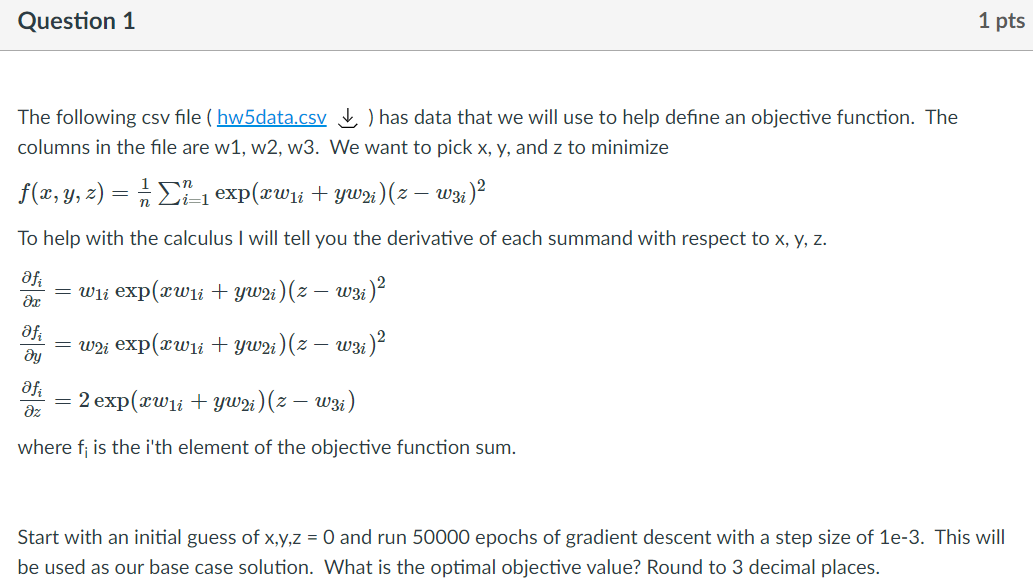

In [3]:
from IPython.display import Image
Image("Q1.png")

In [4]:
df=pd.read_csv('hw5data.csv')
df

,w1,w2,w3
0,0.804264,-0.279226,0.675103
1,-0.498909,-0.191620,1.637611
2,-0.773979,-0.208076,0.174573
3,1.907634,2.186758,3.022080
4,-0.642327,0.354942,0.833098
...,...,...,...
195,0.094264,0.557352,2.500823
196,0.591495,0.009174,1.581164
197,0.931319,0.894461,0.592521
198,-0.803304,1.603877,0.376878


In [43]:
epochs = 50000
learning_rate = 0.001
w1=df['w1']
w2=df['w2']
w3=df['w3']

GDvalError = np.zeros(epochs)
GDError = np.zeros(epochs)
#var[0]=x; var[1]=y; var[2]=z
var = np.zeros(3)

for ep in range(epochs):
    
    grad0 = np.mean(w1*np.exp(w1*var[0]+w2*var[1])*(var[2]-w3)**2)
    grad1 = np.mean(w2*np.exp(w1*var[0]+w2*var[1])*(var[2]-w3)**2)
    grad2 = np.mean(2*np.exp(w1*var[0]+w2*var[1])*(var[2]-w3))
    grad = np.array([grad0,grad1,grad2])
    
    var -= learning_rate*grad
    
    GDError[ep] = np.mean(np.exp(w1*var[0]+w2*var[1])*(var[2]-w3)**2)

print(GDError[ep])

0.984018520202135


# Q2
Now use stochastic gradient descent to solve this problem.  Set your batch size to be 10 (number of data points in each batch...not the total number of batches).  Run 100 epochs, starting at an initial guess of x,y,z=0.  Before your outer-most for loop set your seed to be 4382 by running np.random.seed(4382) so that everyone gets the same answer!

What is the objective now?

In [19]:
df.shape[0]

200

In [36]:
# stochastic gradient descent

epoch_SGD = 100
SGDError = np.zeros(epochs)
var = np.zeros(3)
batches = 20
ndata = df.shape[0]
dat_per_bat = int(ndata/batches)
np.random.seed(4382)

for ep in range(epoch_SGD):
    shuf = np.random.choice(range(ndata),size=ndata,replace=False)
    for bat in range(batches):
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        
        grad0 = np.mean(w1[this_bat]*np.exp(w1[this_bat]*var[0]+w2[this_bat]*var[1])*(var[2]-w3[this_bat])**2)
        grad1 = np.mean(w2[this_bat]*np.exp(w1[this_bat]*var[0]+w2[this_bat]*var[1])*(var[2]-w3[this_bat])**2)
        grad2 = np.mean(2*np.exp(w1[this_bat]*var[0]+w2[this_bat]*var[1])*(var[2]-w3[this_bat]))
        grad = np.array([grad0,grad1,grad2])
    
        var -= learning_rate*grad
        
    SGDError[ep] = np.mean(np.exp(w1*var[0]+w2*var[1])*(var[2]-w3)**2)
print(SGDError[ep])
print(np.min(SGDError))


0.9850792803054611
0.9850792803054611


# Q3
Now use ADAM with the usual parameters, and set your seed to 11492.  How many epochs are required to get 3 digits of accuracy, with respect to the solution to the first problem?

In [42]:
# adam

epoch_adam = 200
ADAMvalError = np.zeros(epochs)
ADAMError = np.zeros(epoch_adam)
var = np.zeros(3)
k = 1

m = np.zeros(3)
v = np.zeros(3)

theta1 = 0.9
theta2 = 0.999
np.random.seed(11492)

for ep in range(epoch_adam):
    shuf = np.random.choice(range(ndata),size=ndata,replace=False)
    for bat in range(batches):
        this_bat = shuf[(bat*dat_per_bat):((bat+1)*dat_per_bat)]
        
        grad0 = np.mean(w1[this_bat]*np.exp(w1[this_bat]*var[0]+w2[this_bat]*var[1])*(var[2]-w3[this_bat])**2)
        grad1 = np.mean(w2[this_bat]*np.exp(w1[this_bat]*var[0]+w2[this_bat]*var[1])*(var[2]-w3[this_bat])**2)
        grad2 = np.mean(2*np.exp(w1[this_bat]*var[0]+w2[this_bat]*var[1])*(var[2]-w3[this_bat]))
        grad = np.array([grad0,grad1,grad2])
        
        m = theta1*m + (1-theta1)*grad
        mhat = m/(1-theta1**k)
        
        v = theta2*v + (1-theta2)*(grad**2)
        vhat = v/(1-theta2**k)

        var -= learnRate*mhat/(np.sqrt(vhat)+e)
        k += 1

    
    ADAMError[ep] = np.mean(np.exp(w1*var[0]+w2*var[1])*(var[2]-w3)**2)
print('50---------\n',ADAMError[:50])
print('100---------\n',ADAMError[50:100])
print('150---------\n',ADAMError[100:150])
print('200---------\n',ADAMError[150:200])

50---------
 [1.92607539 1.88725784 1.85090306 1.81290442 1.77823306 1.74402779
 1.70987888 1.6778556  1.64813253 1.61765458 1.59004324 1.56086944
 1.53533842 1.50946023 1.48650568 1.46289542 1.43946786 1.4184536
 1.39842484 1.37777994 1.35930648 1.34062463 1.32344369 1.30727421
 1.29097361 1.27508846 1.26050468 1.2467237  1.2331931  1.22005149
 1.20692363 1.19554725 1.18347994 1.17356622 1.16221492 1.15314054
 1.14342113 1.13485128 1.12599976 1.11791046 1.11019967 1.10248391
 1.09577681 1.09007821 1.08283664 1.07725374 1.07137627 1.06582008
 1.06125892 1.0562417 ]
100---------
 [1.05195823 1.04728925 1.0436437  1.03964545 1.0358162  1.03253037
 1.02961906 1.02613193 1.02362722 1.02131048 1.01809273 1.0162296
 1.01372759 1.01172131 1.01007113 1.00792355 1.00646552 1.00489021
 1.00357858 1.0019698  1.00082659 0.99975189 0.99842554 0.99767614
 0.99652604 0.99543104 0.99457487 0.99410139 0.99332183 0.99253086
 0.99209398 0.99126907 0.99099224 0.9905247  0.98985879 0.98934875
 0.98891093 0